In [1]:
import pandas as pd
import numpy as np
import pathlib
import os

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

np.random.seed(0)

In [2]:
dataset_path = "D:\\Storage\\AnomalyDetection\\wine\\benchmarks"

In [14]:
file_list = list(pathlib.Path(dataset_path).glob('*.csv'))
print(f"Number of files: {len(file_list)}")
print(f"Example path: {file_list[0]}")

Number of files: 1210
Example path: D:\Storage\AnomalyDetection\wine\benchmarks\wine_benchmark_0001.csv


In [15]:
li = []
for filename in file_list[:50]:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

# df = pd.read_csv(file_list[0])
df.shape
df.describe()

(185150, 50)

,original.label,diff.score,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,...,noise..24,noise..25,noise..26,noise..27,noise..28,noise..29,noise..30,noise..31,noise..32,noise..33
count,185150.000000,185150.000000,185150.000000,185150.000000,185150.000000,185150.000000,185150.000000,185150.000000,185150.000000,185150.000000,...,37030.000000,37030.000000,37030.000000,37030.000000,37030.000000,37030.000000,37030.000000,37030.000000,37030.000000,37030.000000
mean,5.821820,0.184060,-0.003067,-0.001873,-0.004124,0.000977,-0.005601,0.000519,-0.000257,-0.002645,...,-0.002497,-0.001473,0.004486,-0.002218,0.004315,-0.006058,-0.006279,-0.004379,0.000239,-0.009774
std,0.873348,0.179302,0.994429,0.994004,0.998160,0.999860,0.975796,0.994600,0.998973,1.001061,...,1.010434,0.997907,0.998337,1.000018,1.016338,0.992243,1.007432,1.003568,1.003339,0.993068
min,3.000000,0.002164,-2.634386,-1.577208,-2.192664,-1.017956,-1.342536,-1.663455,-1.941631,-2.529997,...,-2.975988,-2.789406,-2.433288,-2.634386,-2.557251,-3.100376,-2.975988,-3.100376,-3.100376,-3.100376
25%,5.000000,0.061595,-0.628884,-0.666110,-0.472297,-0.765739,-0.514759,-0.762016,-0.667787,-0.792562,...,-0.702685,-0.649336,-0.680540,-0.628884,-0.706019,-0.737004,-0.674810,-0.706019,-0.609926,-0.680540
50%,6.000000,0.127601,-0.166076,-0.301671,-0.059409,-0.513522,-0.257863,-0.085936,0.039904,0.061149,...,-0.177258,-0.200775,-0.119451,-0.166076,-0.166076,-0.177258,-0.115064,-0.166076,-0.128224,-0.142276
75%,6.000000,0.241031,0.373866,0.366468,0.491108,0.558401,0.255930,0.590143,0.712210,0.758124,...,0.528136,0.477463,0.593772,0.451001,0.529090,0.600438,0.533803,0.528136,0.559923,0.516365
max,9.000000,0.996894,6.698910,7.533774,9.230570,12.685846,15.840967,14.562446,5.736815,14.767654,...,15.840967,15.840967,12.685846,9.230570,15.840967,14.767654,9.870119,9.870119,15.840967,14.767654


In [16]:
df.head()

,point.id,motherset,origin,original.label,diff.score,ground.truth,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,...,noise..24,noise..25,noise..26,noise..27,noise..28,noise..29,noise..30,noise..31,noise..32,noise..33
0,wine_point_3594,wine,regression,7,0.050492,nominal,-1.245962,-0.362411,-0.265853,-0.261304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,wine_point_5089,wine,regression,5,0.082237,anomaly,0.759540,0.973867,0.215849,-0.534540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,wine_point_1912,wine,regression,6,0.290201,nominal,-0.088942,-0.969809,-0.403482,-0.870829,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wine_point_4908,wine,regression,5,0.053559,anomaly,0.219597,0.973867,0.284664,0.138039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,wine_point_2246,wine,regression,7,0.420300,nominal,0.219597,-0.180191,-0.541112,0.348220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df = df.drop(columns=["point.id", "motherset", "origin", "original.label", "diff.score"])
df = df[df.columns.drop(list(df.filter(regex='noise')))]

In [18]:
df.isnull().sum()

ground.truth            0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [19]:
data = df.copy()
data.shape

(185150, 12)

<AxesSubplot:xlabel='ground.truth', ylabel='count'>

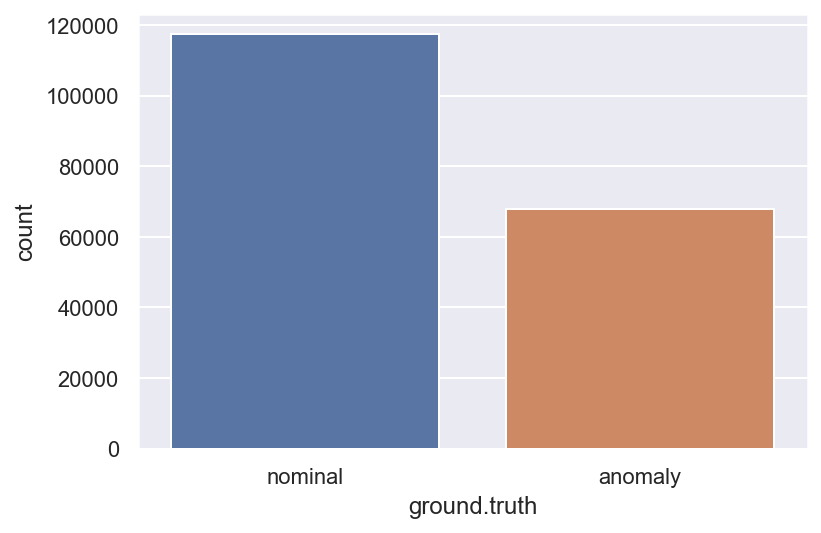

In [20]:
sns.set(style = "darkgrid")
sns.countplot(x = "ground.truth", data=data)

In [21]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df["ground.truth"] = enc.fit_transform(df["ground.truth"])

<Figure size 1296x360 with 0 Axes>

<AxesSubplot:>

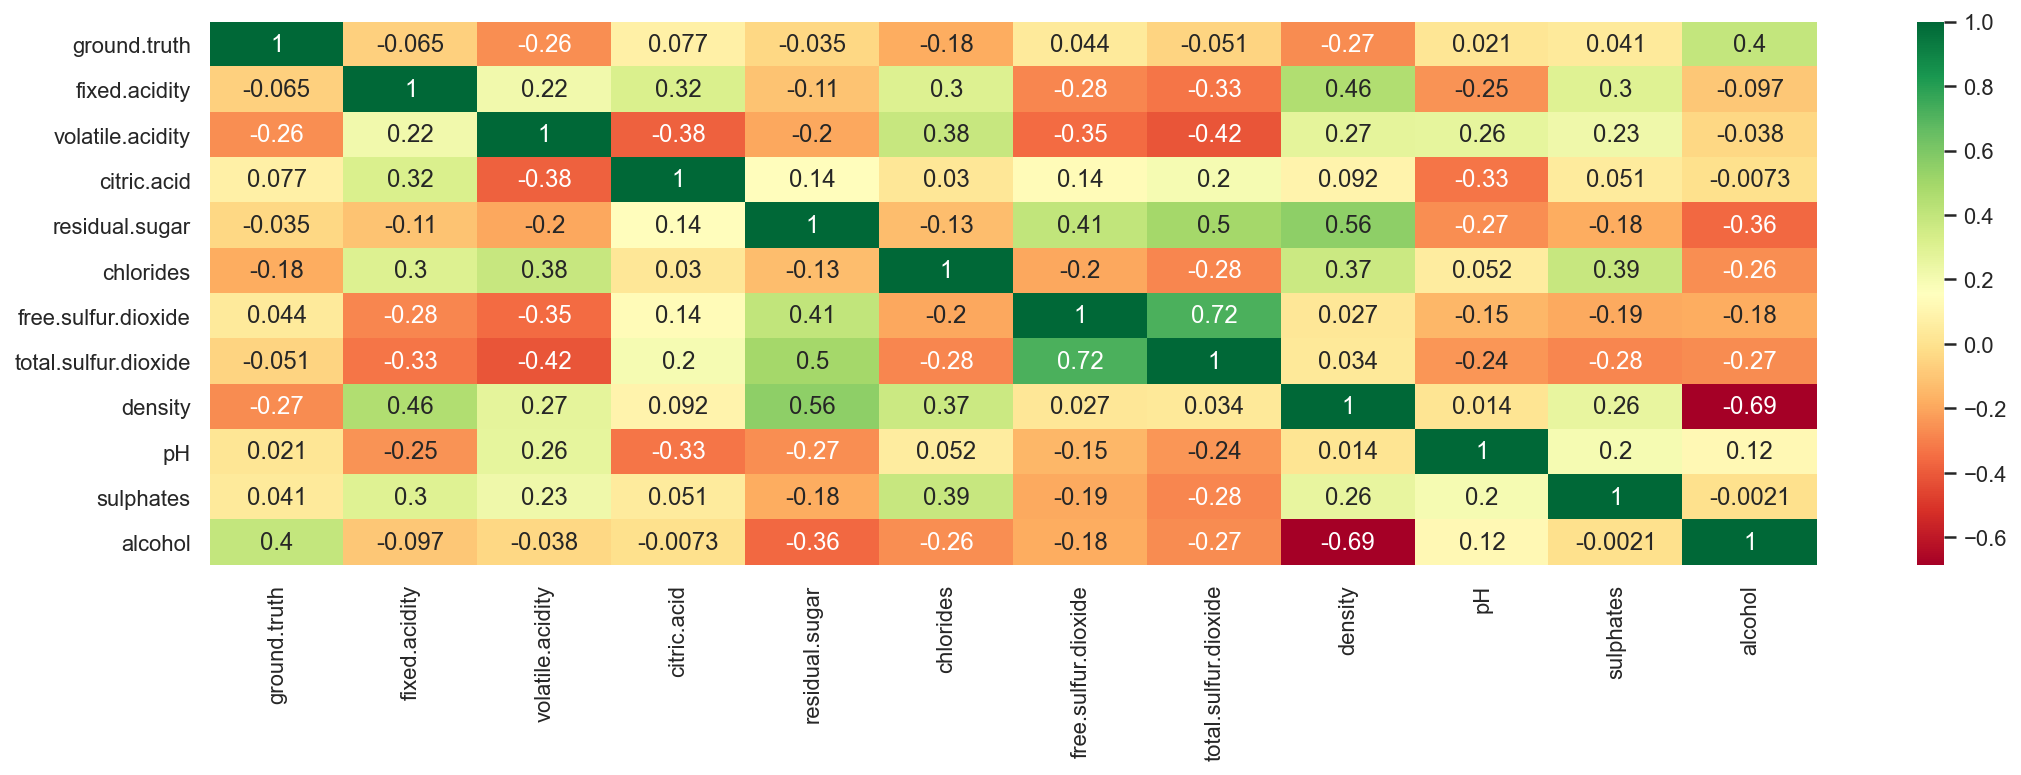

In [22]:
data = df.copy()
plt.figure(figsize=(18,5))
sns.heatmap(data.corr(),annot=True,cmap = "RdYlGn")

In [23]:
data_y = data["ground.truth"]
data_x = data.drop(columns = ["ground.truth"])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=1)

In [25]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [26]:
sample = X_test.to_numpy()[1]
sample
y_test.to_numpy()[1]


clf.predict(np.reshape(sample, (1, -1)))

from joblib import dump, load
dump(clf, "./decision_tree_classifier.joblib")

array([ 4.30773489, -0.24093081,  2.89962136, -0.59759408,  1.11225043,
       -1.21273506, -1.55240084,  1.56848251, -0.11506417,  1.60431653,
        0.25840206])

1

array([1])

['./decision_tree_classifier.joblib']

In [27]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8625168782068593


<AxesSubplot:>

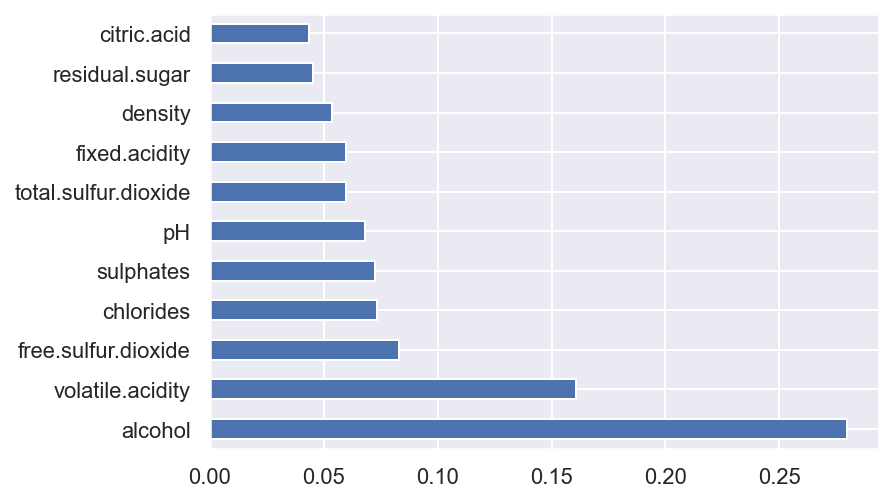

In [28]:
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [29]:
from sklearn.feature_selection import RFE

model = DecisionTreeClassifier(criterion="entropy", max_depth=10)
rfe = RFE(model, n_features_to_select=4)
fit=rfe.fit(X_train,y_train)

print(X_train.columns)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Num Features: 4
Selected Features: [False  True False False False False  True False False  True  True]
Feature Ranking: [3 1 8 7 4 2 1 6 5 1 1]


In [30]:
data_x.columns[fit.support_]

Index(['volatile.acidity', 'total.sulfur.dioxide', 'sulphates', 'alcohol'], dtype='object')

In [31]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn import svm

In [32]:
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope()),
    ("One-Class SVM", svm.OneClassSVM(kernel="rbf", gamma=0.1)),
    ("Isolation Forest", IsolationForest(random_state=42))
]

In [33]:
for name, algorithm in anomaly_algorithms:
    algorithm.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Accuracy {name}:", metrics.accuracy_score(y_test, y_pred))

EllipticEnvelope()

Accuracy Robust covariance: 0.8625168782068593
